In [30]:
import os
import numpy as np
import pandas as pd

path = './plot'
smooth_ = 20

record = dict()
record['task'] = []
record['performance'] = []
record['file'] = []
record['iteration'] = []

for file in os.listdir(path):
    with open(os.path.join(path, file)) as f:
        flag = False
        for line in f.readlines():
            if flag:
                task = line.split()[0]
                iteration = int(line.split()[1])
                performance = float(line.split()[-1])
                record['task'].append(task)
                record['performance'].append(performance)
                record['iteration'].append(iteration)
                record['file'].append(file)
                # print(task, iteration, performance, file)
            if line[:3] == '---':
                flag = True

df = pd.DataFrame(record)


def smooth(x, smooth):
    y = np.ones(smooth)
    z = np.ones(len(x))
    smoothed_x = np.convolve(x,y,'same') / np.convolve(z,y,'same')
    return smoothed_x

df_smooth = pd.DataFrame()
for file in os.listdir(path):
    for i in range(1, 11):
        task = f'Mk{i:02d}.fjs'
        df_tmp = df.copy()
        df_tmp = df_tmp[(df_tmp.task == task) & (df_tmp.file == file)]
        df_tmp.performance = smooth(df_tmp.performance.to_numpy(), smooth=smooth_)
        df_smooth = pd.concat([df_smooth, df_tmp])

df = df_smooth.copy()
df.head()

,task,performance,file,iteration
0,Mk01.fjs,61.400000,with tabu search.txt,0
1,Mk01.fjs,60.636364,with tabu search.txt,1
2,Mk01.fjs,59.750000,with tabu search.txt,2
3,Mk01.fjs,59.000000,with tabu search.txt,3
4,Mk01.fjs,58.357143,with tabu search.txt,4


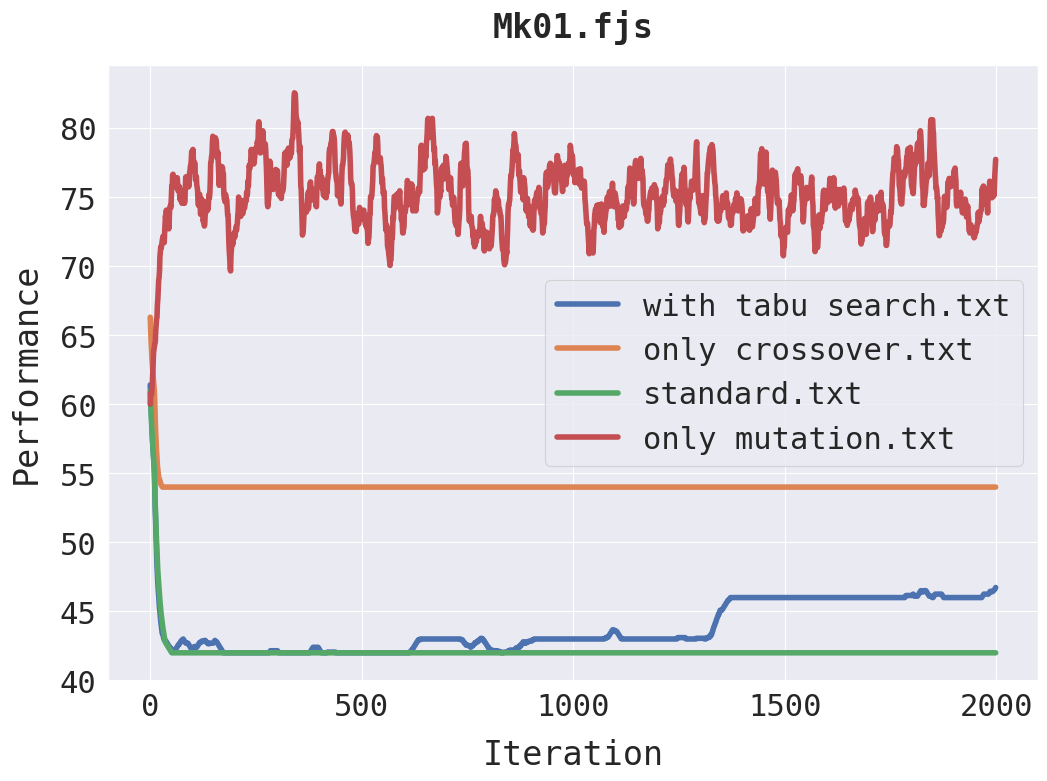

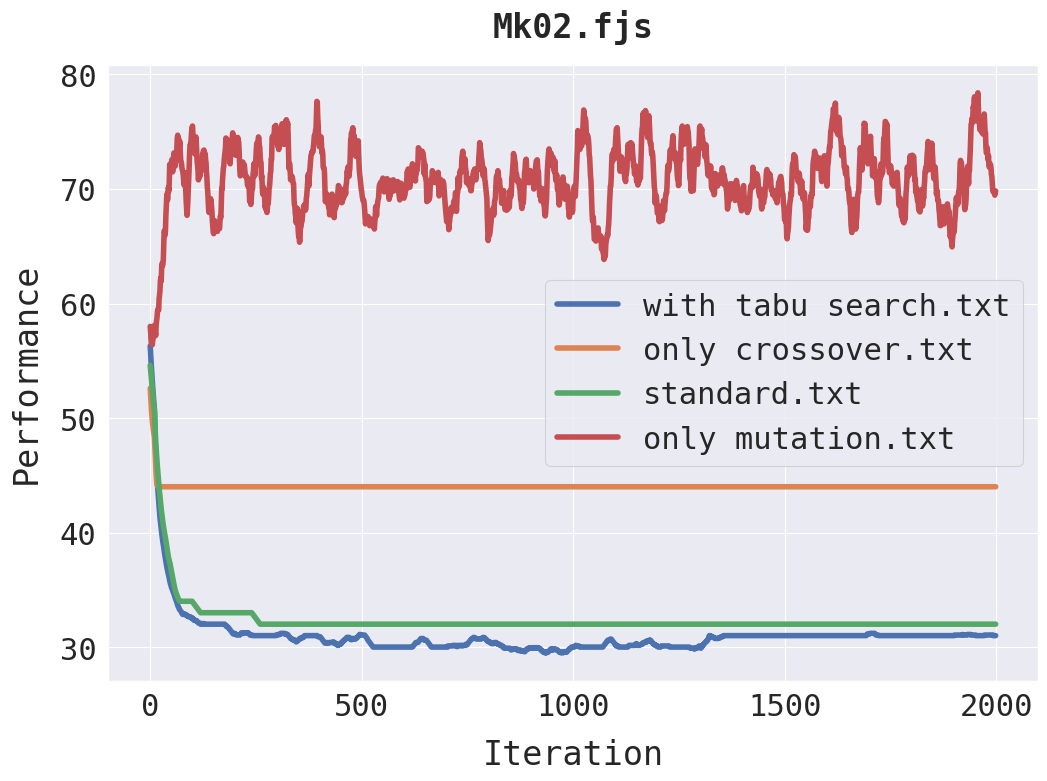

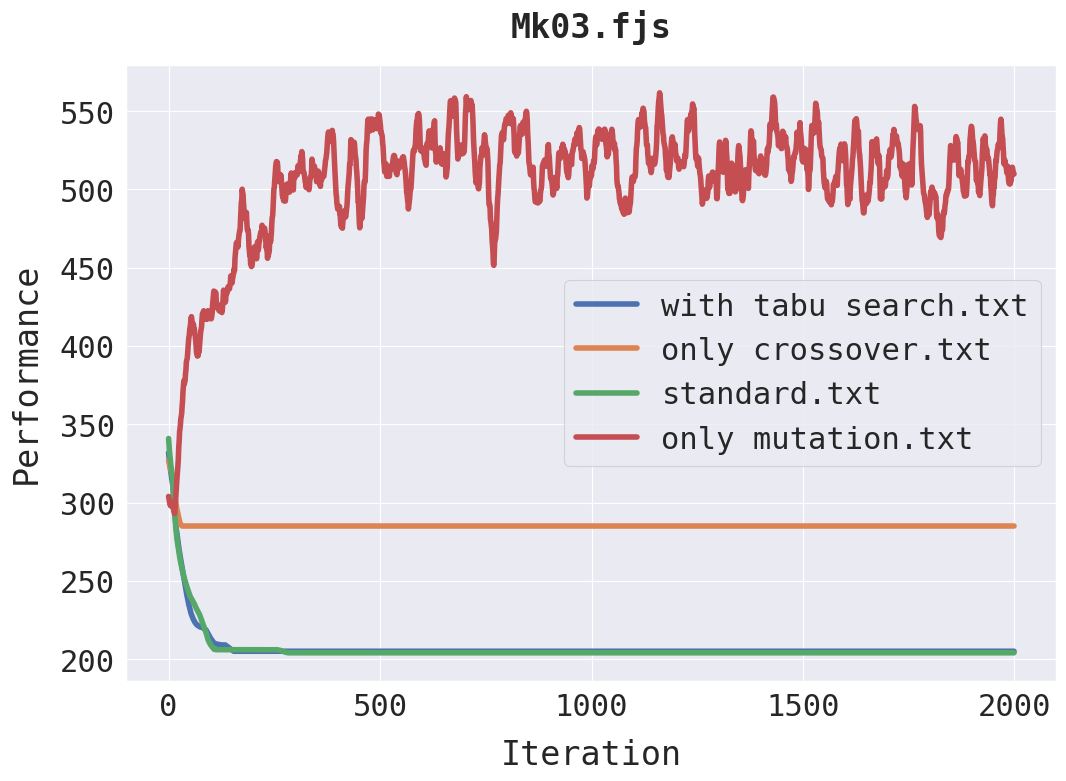

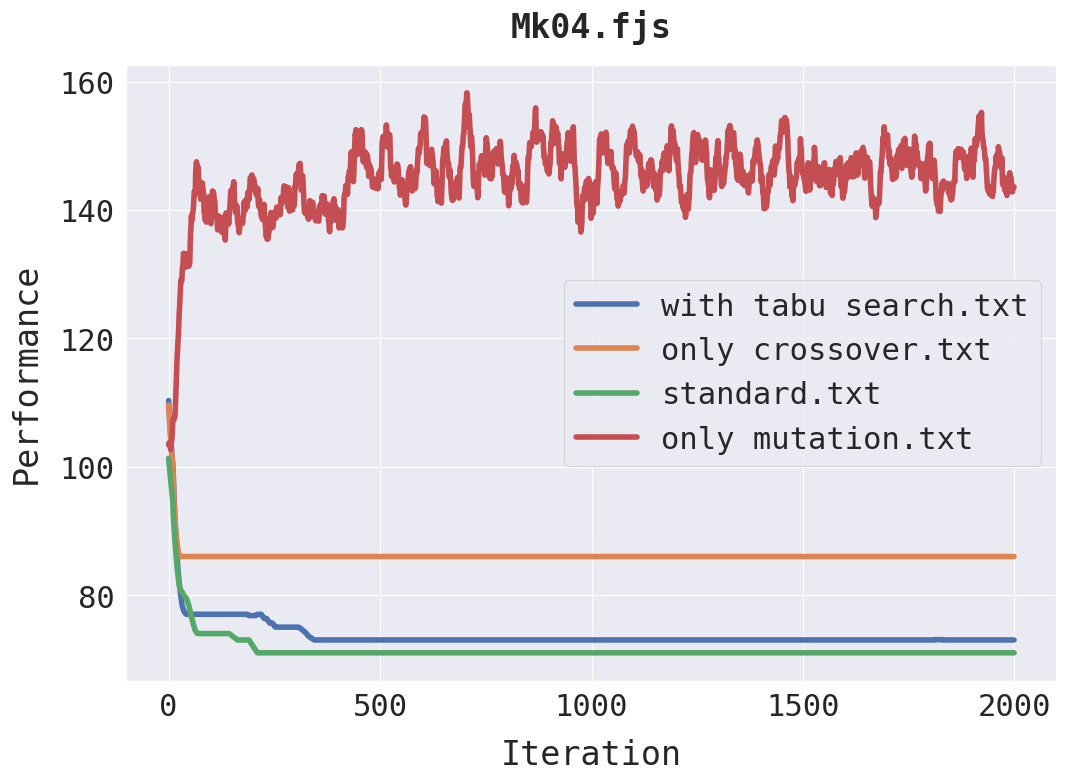

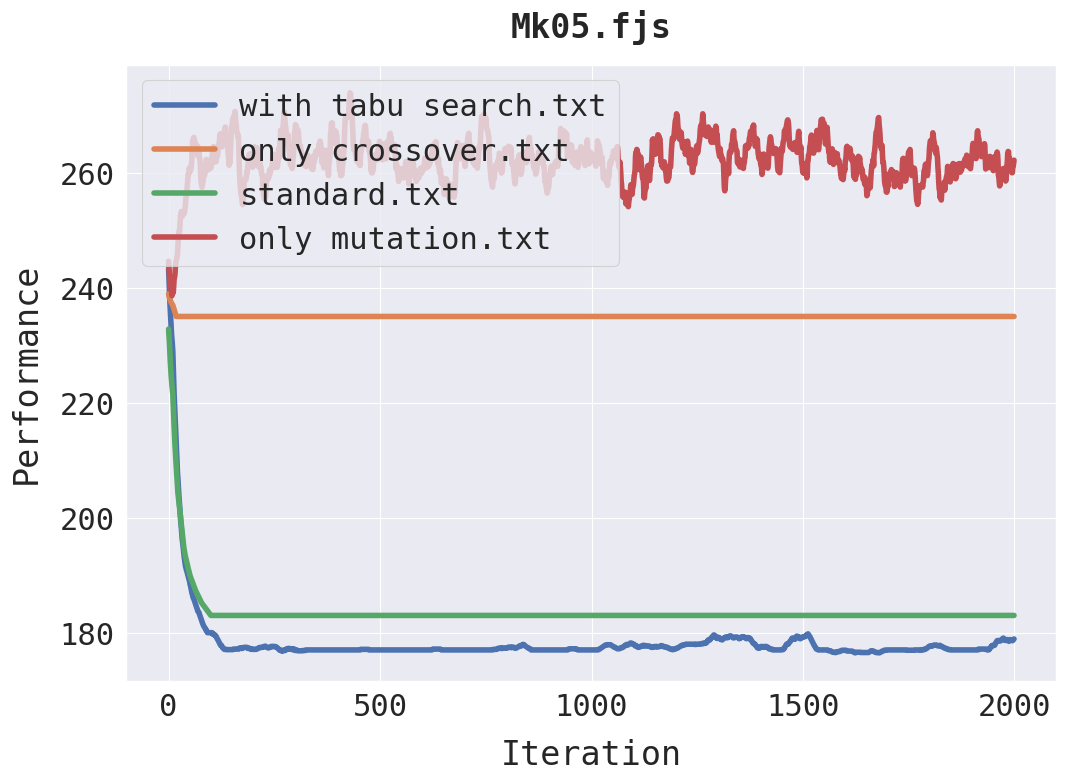

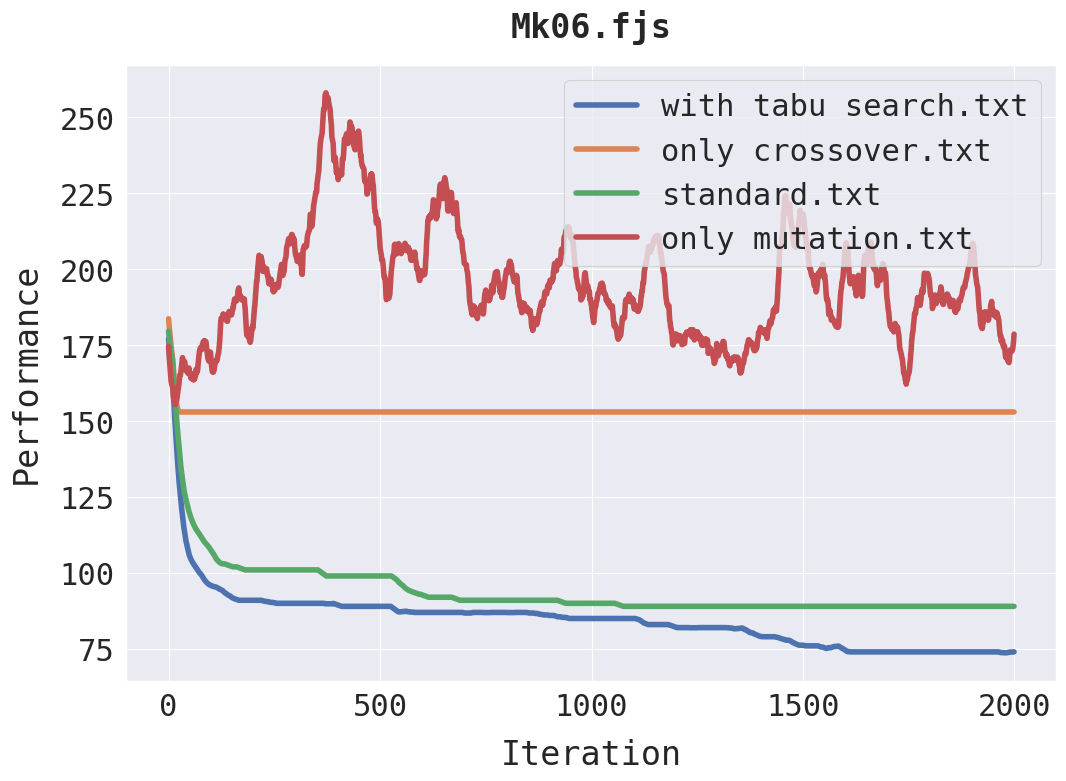

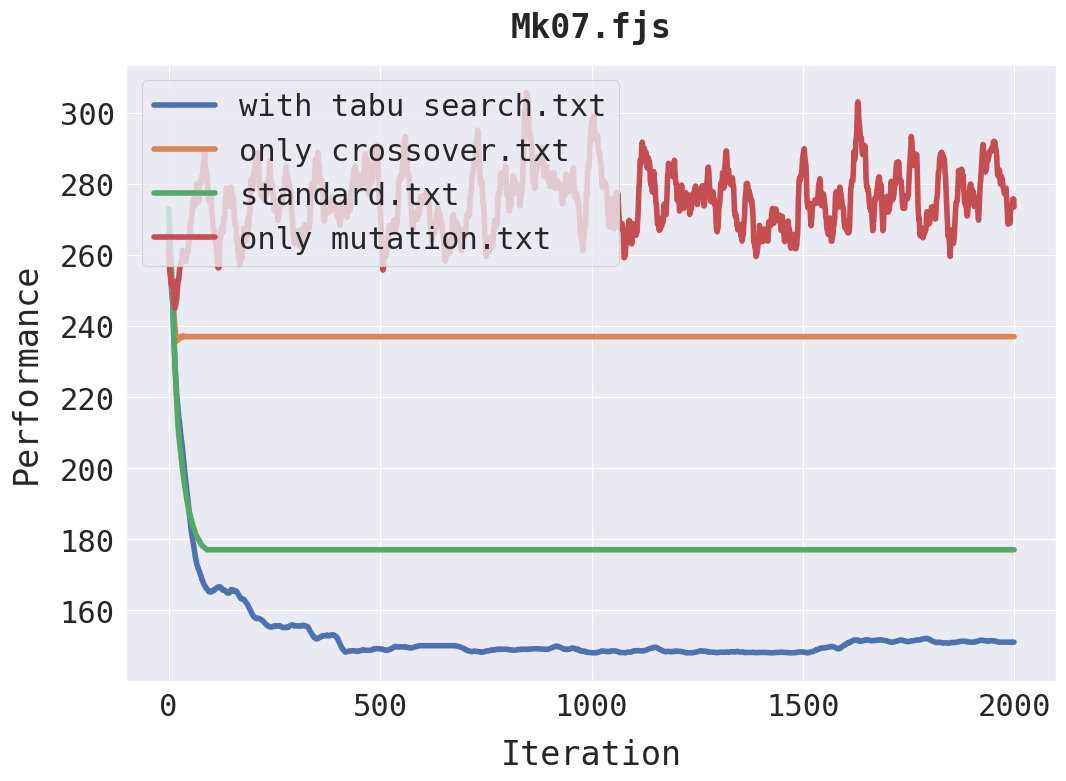

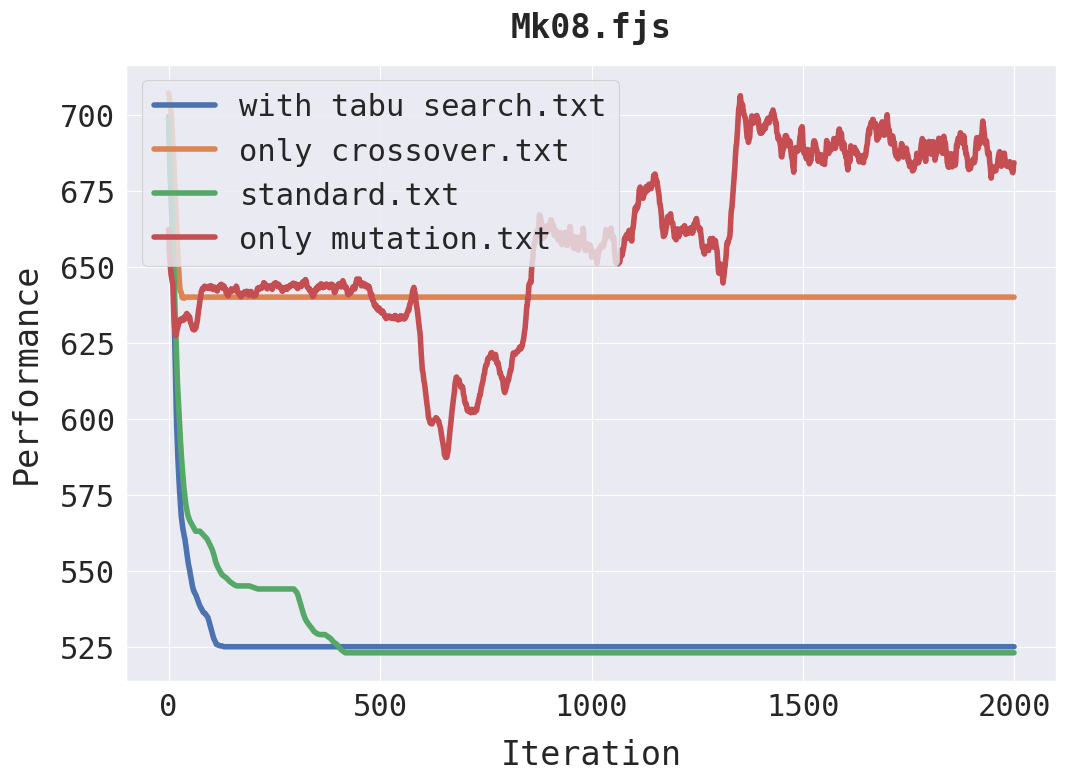

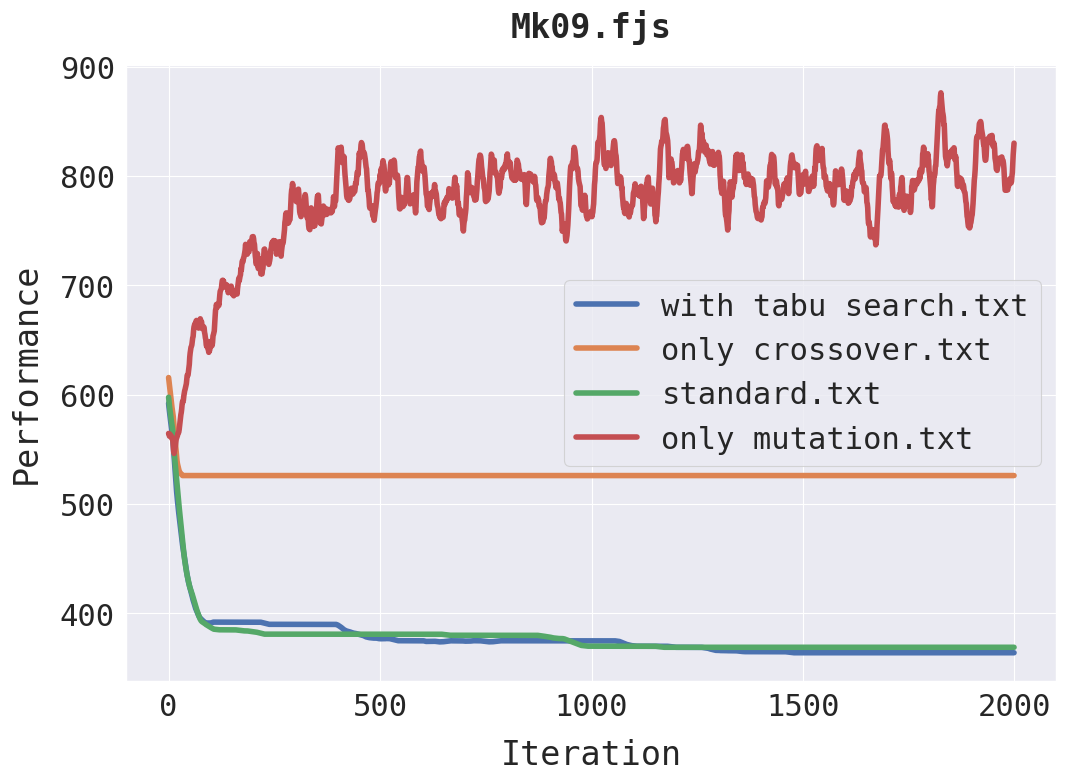

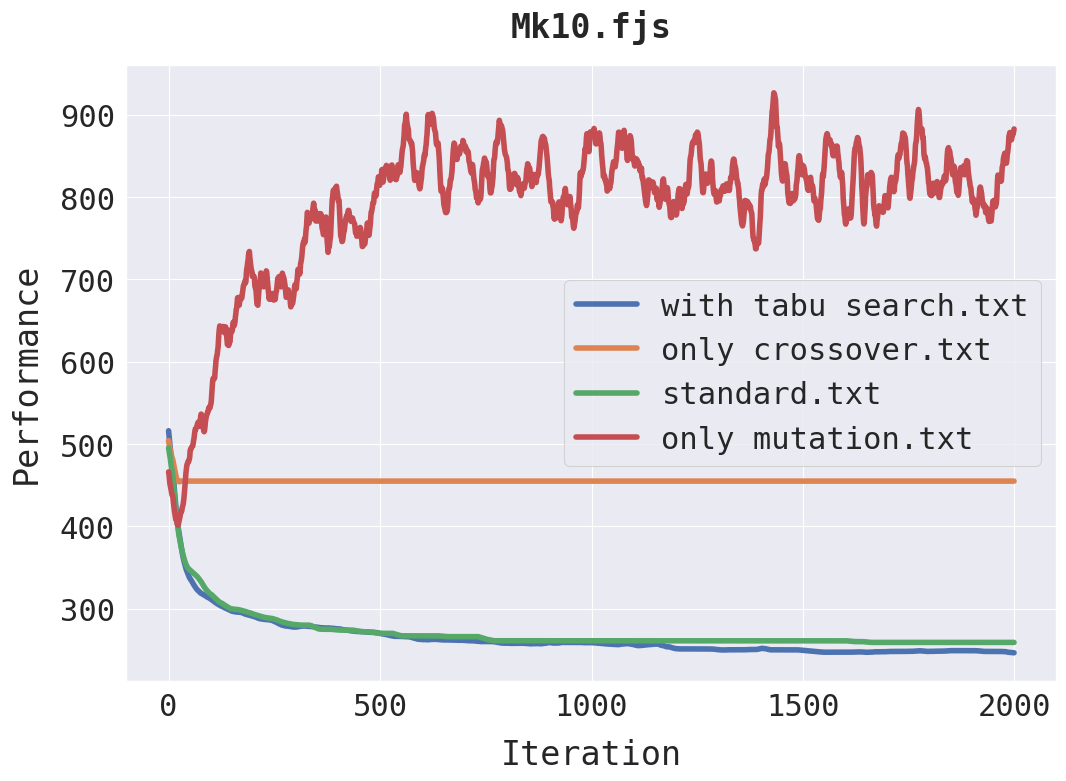

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    style='darkgrid',
    font='monospace',
    context='paper',
    font_scale=2.5,
)

scalar=2.0


for i in range(1, 11):

    task = f'Mk{i:02d}.fjs'
    plt.figure(figsize=(6*scalar, 4*scalar))
    graph = sns.lineplot(
        data=df[df.task == task],
        x='iteration',
        y='performance',
        hue='file',
        linewidth=4.0,
        markers=False,
        dashes=False,
        markersize=12.0,
    )
    plt.legend(loc='best').set_draggable(True)
    graph.set_xlabel(xlabel='Iteration', labelpad=12)
    graph.set_ylabel(ylabel='Performance', labelpad=12)
    graph.set_xticks([0, 500, 1000, 1500, 2000])
    # graph.set_yticks(np.arange())
    graph.set_title(label=task, fontdict=dict(weight='bold'), pad=20)

    # plt.show()
    plt.savefig(os.path.join(path, f'{task}-ablation.png'))

      task  performance
0     MK01            7
1     MK01           17
2     MK01           17
3     MK01           10
4     MK01           15
...    ...          ...
1395  MK10           24
1396  MK10           25
1397  MK10           29
1398  MK10           31
1399  MK10           31

[1400 rows x 2 columns]


/tmp/ipykernel_3925711/3063367027.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.boxplot(


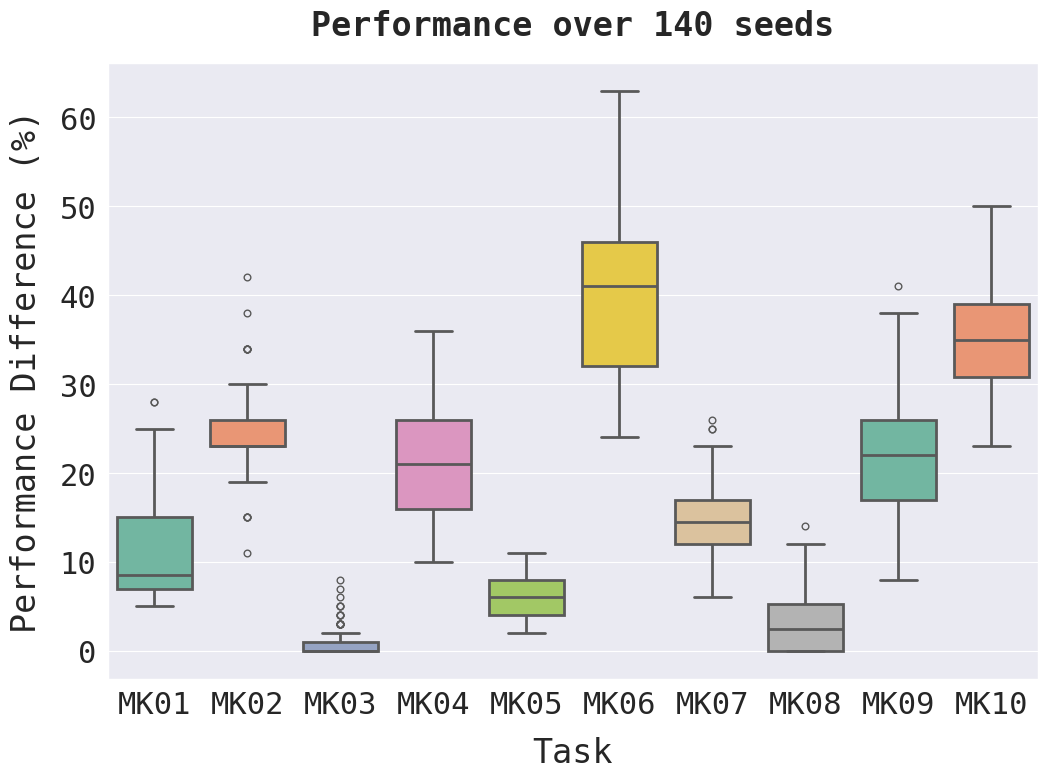

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    style='darkgrid',
    font='monospace',
    context='paper',
    font_scale=2.5,
)

scalar = 2.0

mapp = {
    'MK01':39.0,
    'MK02':26.0,
    'MK03':204.0,
    'MK04':60.0,
    'MK05':172.0,
    'MK06':58.0,
    'MK07':139.0,
    'MK08':523.0,
    'MK09':307.0,
    'MK10':197.0,
}


record = dict()
record['task'] = list()
record['performance'] = list()

flag = False
with open('./plot/MK 140seeds.txt') as f:
    for line in f.readlines():

        if flag:
            performance = line.split()[4:]
            performance = [int(per.replace('[', '').replace(']', '').replace(',', '')) for per in performance]
            performance = [int(100*(per-mapp[task])/mapp[task]) for per in performance]
            record['task'] += [task]*len(performance)
            record['performance'] += performance
            flag = False


        if 'Test case' in line:
            task = line.split()[-1]
            flag = True

df = pd.DataFrame(record)
# df.head()
print(df)

plt.figure(figsize=(6*scalar, 4*scalar))
graph = sns.boxplot(
    data=df,
    x='task',
    y='performance',
    palette="Set2",
    linewidth=2.0,
)
# plt.legend(loc='best').set_draggable(True)
graph.set_xlabel(xlabel='Task', labelpad=12)
graph.set_ylabel(ylabel='Performance Difference (%)', labelpad=12)
# graph.set_xticks([0, 500, 1000, 1500, 2000])
# graph.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
graph.set_title(label='Performance over 140 seeds', fontdict=dict(weight='bold'), pad=20)

# plt.show()
plt.savefig(os.path.join(path, f'boxplot.png'))

In [115]:
import pandas as pd

df = pd.read_excel('./plot/EA_final.xlsx')
df.rename(columns={
    'Unnamed: 0': 'task', 
    'ours': 'Ours',
    'time.1': 'timee',
    'time.2': 'timeee',
    'time.3': 'timeeee',
    'time.4': 'timeeeee',
    'time.5': 'timeeeeee',
    'time.6': 'timeeeeeee',
}, inplace=True)
df.set_index('task', inplace=True)
df.head()

df.Ours = [str(i).replace('(', '').replace(')', '').replace(',', ' /').replace('\'', '') \
    for i in list(zip([f'{k:3.0f}' for k in df.Ours.tolist()], [f'{j:.3f}' for j in df.time.tolist()]))]
df.SPT = [str(i).replace('(', '').replace(')', '').replace(',', ' /').replace('\'', '') \
    for i in list(zip([f'{k:3.0f}' for k in df.SPT.tolist()], [f'{j:.3f}' for j in df.timee.tolist()]))]
df.FIFO = [str(i).replace('(', '').replace(')', '').replace(',', ' /').replace('\'', '') \
    for i in list(zip([f'{k:3.0f}' for k in df.FIFO.tolist()], [f'{j:.3f}' for j in df.timeee.tolist()]))]
df.MOR = [str(i).replace('(', '').replace(')', '').replace(',', ' /').replace('\'', '') \
    for i in list(zip([f'{k:3.0f}' for k in df.MOR.tolist()], [f'{j:.3f}' for j in df.timeeee.tolist()]))]
df.MWKR = [str(i).replace('(', '').replace(')', '').replace(',', ' /').replace('\'', '') \
    for i in list(zip([f'{k:3.0f}' for k in df.MWKR.tolist()], [f'{j:.3f}' for j in df.timeeeee.tolist()]))]
df.pezzella = [str(i).replace('(', '').replace(')', '').replace(',', ' /').replace('\'', '') \
    for i in list(zip([f'{k:3.0f}' for k in df.pezzella.tolist()], [f'{j:.3f}' for j in df.timeeeeee.tolist()]))]
df['2SGA'] = [str(i).replace('(', '').replace(')', '').replace(',', ' /').replace('\'', '') \
    for i in list(zip([f'{k:3.0f}' for k in df['2SGA'].tolist()], [f'{j:.3f}' for j in df.timeeeeeee.tolist()]))]

df.drop(columns=['time', 'timee', 'timeee', 'timeeee', 'timeeeee', 'timeeeeee', 'timeeeeeee'], inplace=True)
df.head(10)

,Ours,SPT,FIFO,MOR,MWKR,pezzella,2SGA
task,,,,,,,
MK01,41 / 1.000,55 / 0.009,50 / 0.010,54 / 0.008,49 / 0.009,42 / 2.000,41 / 2.000
MK02,29 / 6.614,55 / 0.010,39 / 0.011,41 / 0.010,41 / 0.010,27 / 44.000,27 / 1.000
MK03,204 / 2.949,268 / 0.031,227 / 0.030,222 / 0.020,204 / 0.027,204 / 15.000,204 / 1.000
MK04,66 / 0.784,78 / 0.018,83 / 0.019,82 / 0.018,73 / 0.018,68 / 150.000,63 / 50.000
MK05,177 / 9.641,224 / 0.018,189 / 0.020,187 / 0.010,189 / 0.019,175 / 126.000,173 / 8.000
MK06,72 / 20.676,82 / 0.033,107 / 0.031,92 / 0.031,98 / 0.031,71 / 394.000,64 / 12.000
MK07,148 / 2.508,227 / 0.023,212 / 0.027,215 / 0.020,214 / 0.024,144 / 180.000,141 / 4.000
MK08,523 / 8.087,601 / 0.056,523 / 0.062,523 / 0.060,523 / 0.061,559 / 286.000,523 / 6.000
MK09,334 / 14.458,431 / 0.058,345 / 0.058,331 / 0.050,336 / 0.055,336 / 901.000,311 / 139.000
